In [30]:
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [31]:
print("python:{}, keras:{}, tensorflow: {}".format(sys.version, keras.__version__, tf.__version__))

python:3.5.2 | packaged by conda-forge | (default, Jan 19 2017, 15:28:33) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)], keras:1.2.2, tensorflow: 1.0.0


In [52]:
Data=[[[(i+j)/100] for i in range(5)] for j in range(100)]
target=[(i+5)/100 for i in range(100)]

In [53]:
data=np.array(Data,dtype=float)
target=np.array(target,dtype=float)
data.shape
target

array([ 0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,
        0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,
        0.23,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.3 ,  0.31,
        0.32,  0.33,  0.34,  0.35,  0.36,  0.37,  0.38,  0.39,  0.4 ,
        0.41,  0.42,  0.43,  0.44,  0.45,  0.46,  0.47,  0.48,  0.49,
        0.5 ,  0.51,  0.52,  0.53,  0.54,  0.55,  0.56,  0.57,  0.58,
        0.59,  0.6 ,  0.61,  0.62,  0.63,  0.64,  0.65,  0.66,  0.67,
        0.68,  0.69,  0.7 ,  0.71,  0.72,  0.73,  0.74,  0.75,  0.76,
        0.77,  0.78,  0.79,  0.8 ,  0.81,  0.82,  0.83,  0.84,  0.85,
        0.86,  0.87,  0.88,  0.89,  0.9 ,  0.91,  0.92,  0.93,  0.94,
        0.95,  0.96,  0.97,  0.98,  0.99,  1.  ,  1.01,  1.02,  1.03,  1.04])

In [54]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=4)

In [60]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_6 (LSTM)                    (None, 5, 1)          12          lstm_input_6[0][0]               
____________________________________________________________________________________________________
lstm_7 (LSTM)                    (None, 1)             12          lstm_6[0][0]                     
Total params: 24
Trainable params: 24
Non-trainable params: 0
____________________________________________________________________________________________________


In [61]:
history=model.fit(x_train,y_train,nb_epoch=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 0s - loss: 0.4159 - acc: 0.0000e+00 - val_loss: 0.2973 - val_acc: 0.0000e+00
Epoch 2/500
80/80 [==============================] - 0s - loss: 0.4121 - acc: 0.0000e+00 - val_loss: 0.2929 - val_acc: 0.0000e+00
Epoch 3/500
80/80 [==============================] - 0s - loss: 0.4078 - acc: 0.0000e+00 - val_loss: 0.2885 - val_acc: 0.0000e+00
Epoch 4/500
80/80 [==============================] - 0s - loss: 0.4037 - acc: 0.0000e+00 - val_loss: 0.2843 - val_acc: 0.0000e+00
Epoch 5/500
80/80 [==============================] - 0s - loss: 0.4003 - acc: 0.0000e+00 - val

In [62]:
result=model.predict(x_test)

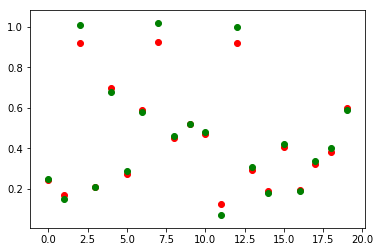

In [63]:
plt.scatter(range(20),result,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

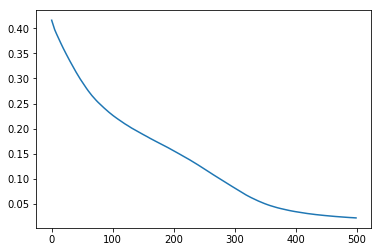

In [64]:
plt.plot(history.history['loss'])
plt.show()